# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests
import matplotlib.pyplot as plt
url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('table',attrs={'class':"table table-striped table-hover table-hover-solid-row table-simple history-data"})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/22/2021
   </td>
   <td>
    Monday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-22-2021">
     14,378.72677
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-22-2021">
     USD IDR rate for 3/22/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/19/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/ID


In [6]:
tr = table.find_all('tr')
tr[:13] # just call 2 founded tr

[<tr><td>3/22/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/3-22-2021">14,378.72677</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-22-2021">USD IDR rate for 3/22/2021</a></td></tr>,
 <tr><td>3/19/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/3-19-2021">14,409.66972</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-19-2021">USD IDR rate for 3/19/2021</a></td></tr>,
 <tr><td>3/18/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-18-2021">14,423.29934</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-18-2021">USD IDR rate for 3/18/2021</a></td></tr>,
 <tr><td>3/17/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-17-2021">14,346.28612</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-17-2021">USD IDR rate for 3/17/2021</a></td></tr>,
 <tr><td>3/16/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-16-2021">14,407.76927</a> IDR</td><td class="text-narrow-screen-hid

Do the scrapping process here (please change this markdown with your explanation)

In [7]:
tr = table.find_all('tr', attrs={'class':""})
tr

[<tr><td>3/22/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/3-22-2021">14,378.72677</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-22-2021">USD IDR rate for 3/22/2021</a></td></tr>,
 <tr><td>3/19/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/3-19-2021">14,409.66972</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-19-2021">USD IDR rate for 3/19/2021</a></td></tr>,
 <tr><td>3/18/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-18-2021">14,423.29934</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-18-2021">USD IDR rate for 3/18/2021</a></td></tr>,
 <tr><td>3/17/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-17-2021">14,346.28612</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-17-2021">USD IDR rate for 3/17/2021</a></td></tr>,
 <tr><td>3/16/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-16-2021">14,407.76927</a> IDR</td><td class="text-narrow-screen-hid

In [8]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr',attrs={'class':""})[i]
    
    #get tanggal
    date = row.find_all('td')[0].text
    date = date.strip()
    
    #get hari
    day = row.find_all('td')[1].text
    day = day.strip()
    
    #get nilai uang
    value = row.find_all('td')[2].text
    value = value.strip()
    
    #get tulisan
    note = row.find_all('td')[3].text
    note = note.strip()
    
    temp.append((date, day, value, note))
    
temp

[('3/19/2021', 'Friday', '14,409.66972 IDR', 'USD IDR rate for 3/19/2021'),
 ('3/18/2021', 'Thursday', '14,423.29934 IDR', 'USD IDR rate for 3/18/2021'),
 ('3/17/2021', 'Wednesday', '14,346.28612 IDR', 'USD IDR rate for 3/17/2021'),
 ('3/16/2021', 'Tuesday', '14,407.76927 IDR', 'USD IDR rate for 3/16/2021'),
 ('3/15/2021', 'Monday', '14,423.68150 IDR', 'USD IDR rate for 3/15/2021'),
 ('3/12/2021', 'Friday', '14,393.57497 IDR', 'USD IDR rate for 3/12/2021'),
 ('3/11/2021', 'Thursday', '14,319.87571 IDR', 'USD IDR rate for 3/11/2021'),
 ('3/10/2021', 'Wednesday', '14,387.89293 IDR', 'USD IDR rate for 3/10/2021'),
 ('3/9/2021', 'Tuesday', '14,396.25662 IDR', 'USD IDR rate for 3/9/2021'),
 ('3/8/2021', 'Monday', '14,374.33106 IDR', 'USD IDR rate for 3/8/2021'),
 ('3/5/2021', 'Friday', '14,292.17893 IDR', 'USD IDR rate for 3/5/2021'),
 ('3/4/2021', 'Thursday', '14,261.85426 IDR', 'USD IDR rate for 3/4/2021'),
 ('3/3/2021', 'Wednesday', '14,257.29443 IDR', 'USD IDR rate for 3/3/2021'),
 ('3/

## Creating data frame & Data wrangling

Put the array into dataframe

In [36]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date','Day','IDR','Note'))
df['IDR'] = df['IDR'].replace('IDR','',regex=True).replace(',',"",regex=True)
df['IDR'] = df['IDR'].astype('float64')
df['Date'] = df['Date'].astype('datetime64')
df.dtypes

Date    datetime64[ns]
Day             object
IDR            float64
Note            object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [33]:
Exchanges = df[['IDR']].set_index(df.Date).sort_values(by='Date', ascending=False)
Exchanges

,IDR
Date,
2021-03-19,14409.66972
2021-03-18,14423.29934
2021-03-17,14346.28612
2021-03-16,14407.76927
2021-03-15,14423.68150
...,...
2020-09-28,14892.32194
2020-09-27,14859.98349
2020-09-25,14855.63943


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Text(0, 0.5, 'IDR')

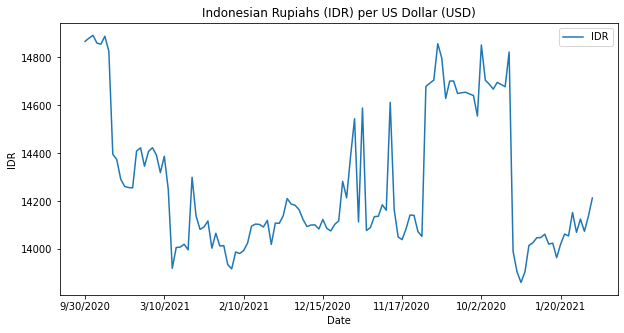

In [11]:
Exchanges.plot(title='Indonesian Rupiahs (IDR) per US Dollar (USD)',figsize=(10,5)).set_ylabel('IDR')


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

In [12]:
Exchanges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 9/30/2020 to 1/1/2021
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IDR     129 non-null    float64
dtypes: float64(1)
memory usage: 2.0+ KB


In [13]:
Exchanges_Reset_index =Exchanges.reset_index()

In [14]:
Exchanges_Reset_index['Date'] = Exchanges_Reset_index['Date'].astype('datetime64')

In [15]:
pd.to_datetime(Exchanges_Reset_index['Date'], dayfirst =True)

0     2020-09-30
1     2020-09-29
2     2020-09-28
3     2020-09-27
4     2020-09-25
         ...    
124   2021-01-14
125   2021-01-13
126   2021-01-12
127   2021-01-11
128   2021-01-01
Name: Date, Length: 129, dtype: datetime64[ns]

In [16]:
Exchanges_Reset_index['Day'] = Exchanges_Reset_index['Date'].dt.day_name()

In [17]:
Exchanges_Reset_index

,Date,IDR,Day
0,2020-09-30,14867.44686,Wednesday
1,2020-09-29,14880.93210,Tuesday
2,2020-09-28,14892.32194,Monday
3,2020-09-27,14859.98349,Sunday
4,2020-09-25,14855.63943,Friday
...,...,...,...
124,2021-01-14,14070.58746,Thursday
125,2021-01-13,14125.90174,Wednesday
126,2021-01-12,14074.81444,Tuesday
127,2021-01-11,14137.24151,Monday


In [18]:
Exchanges_Reset_index.groupby('Day').agg({'IDR':'mean'})

,IDR
Day,
Friday,14281.191143
Monday,14272.300474
Sunday,14859.983490
Thursday,14268.564428
Tuesday,14247.775804
Wednesday,14263.915228


In [19]:
Exchanges_Reset_index['Week'] =Exchanges_Reset_index['Date'].dt.to_period('M')
Exchanges_Reset_index

,Date,IDR,Day,Week
0,2020-09-30,14867.44686,Wednesday,2020-09
1,2020-09-29,14880.93210,Tuesday,2020-09
2,2020-09-28,14892.32194,Monday,2020-09
3,2020-09-27,14859.98349,Sunday,2020-09
4,2020-09-25,14855.63943,Friday,2020-09
...,...,...,...,...
124,2021-01-14,14070.58746,Thursday,2021-01
125,2021-01-13,14125.90174,Wednesday,2021-01
126,2021-01-12,14074.81444,Tuesday,2021-01
127,2021-01-11,14137.24151,Monday,2021-01


In [20]:
mean_Ex_RI = pd.crosstab(index=Exchanges_Reset_index['Day'],
           columns=Exchanges_Reset_index['Week'],
           values=Exchanges_Reset_index['IDR'],
           aggfunc='mean')
mean_Ex_RI#.dropna(how='any')

Week,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
Day,,,,,,,
Friday,14855.639430,14700.844764,14149.499635,14120.459118,14082.246506,14091.153825,14365.141207
Monday,14892.321940,14708.441850,14256.315880,14113.693392,14057.416038,14017.196765,14348.872773
Sunday,14859.983490,NaN,NaN,NaN,NaN,NaN,NaN
Thursday,14888.786070,14706.616416,14196.648107,14124.714288,13997.302972,14039.100480,14335.009770
Tuesday,14880.932100,14687.674963,14205.105303,14124.182250,14026.847788,13988.433313,14353.435433
Wednesday,14846.497925,14686.334510,14201.325225,14095.843544,14014.393330,14022.474155,14330.491160


Text(0, 0.5, 'IDR')

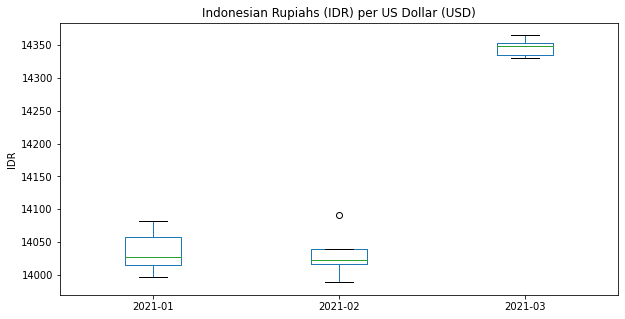

In [21]:
mean_Ex_RI[['2021-01','2021-02','2021-03']].plot.box(title='Indonesian Rupiahs (IDR) per US Dollar (USD)',figsize=(10,5)).set_ylabel('IDR')